In [25]:
#!/usr/bin/env python
import matplotlib.pyplot as plt 
import numpy
import seaborn
import pandas

In [26]:
#Part 1: Wright-Fisher simulation
def simulation(starting_af, pop_size):
    list_af = [starting_af]
    number_of_alleles = 2*pop_size
    prev_af = starting_af
    while prev_af <1 and prev_af >0:
        counts = numpy.random.binomial(n=number_of_alleles, p=prev_af) 
        new_af = counts/number_of_alleles 
        list_af.append(new_af)
        prev_af = new_af
    return list_af

In [27]:
list_of_afs = simulation(starting_af=0.5, pop_size=100)

In [39]:
#Part 2: plotting the simualtion

def plot(list_of_afs, fig_title):
    generations = []
    for gen in range(0, len(list_of_afs), 1):
        generations.append(gen) 
    fig, ax = plt.subplots()
    ax.plot(generations, list_of_afs)
    ax.set_title("Allele Frequency (0.5), (Pop Size = 100)")
    ax.set_xlabel("Generation Number")
    ax.set_ylabel("Allele Frequency")
    fig.savefig(fig_title)

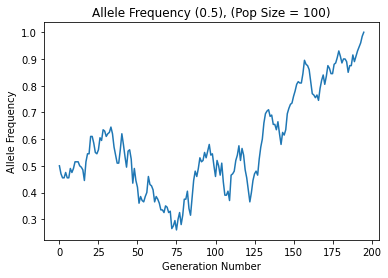

In [40]:
 plot(list_of_afs, "Wright_Fisher_Simulation")

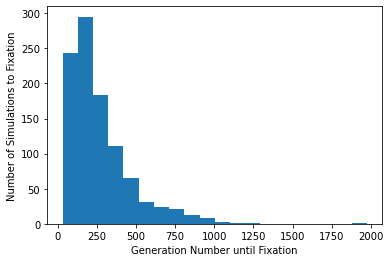

In [30]:
#Part 3: plotting the fixation time density histogram

num_simulations = 1000
gen_num_until_fixation = []
for i in range(num_simulations):
    list_of_afs = simulation(starting_af=0.5, pop_size=100)
    gen_num_until_fixation.append(len(list_of_afs))
fig, ax = plt.subplots()
ax.hist(gen_num_until_fixation, bins=20)   
ax.set_xlabel("Generation Number until Fixation")
ax.set_ylabel("Number of Simulations to Fixation")
fig.savefig("fixationtime_hist.png")

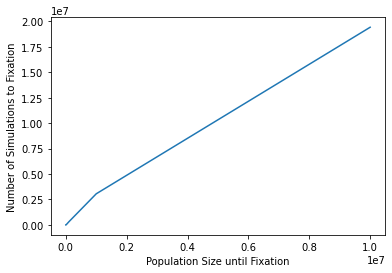

In [22]:
#Part 4: plotting the population size being variable

pop_size_range = [100, 1000, 10000, 100000, 1000000, 10000000]
pop_size_until_fixation = []
for i in pop_size_range:
    list_of_pop_size = simulation(starting_af=0.5, pop_size=i)
    pop_size_until_fixation.append(len(list_of_pop_size))
fig, ax = plt.subplots()
ax.plot(pop_size_range, pop_size_until_fixation)  
ax.set_xlabel("Population Size until Fixation")
ax.set_ylabel("Number of Simulations to Fixation")
fig.savefig("pop_size_variable_plot.png")

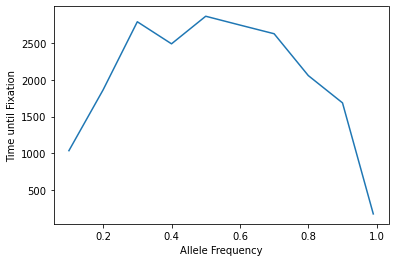

In [31]:
#Part 5: running the simulation for a range of 10 starting allele frequencies from 0 to 1. 100 simulations each

starting_af = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
num_simulations = 100
pop_size=1000
means = []
gens ={}

for i in starting_af:
    af_until_fixation = []
    for sim in range(num_simulations):
        ouput_af_simulations = simulation(starting_af=i, pop_size=pop_size)
        af_until_fixation.append(len(ouput_af_simulations))
    means.append(numpy.mean(af_until_fixation))
    gens[i]=af_until_fixation

fig, ax = plt.subplots()
ax.plot(starting_af, means)  
ax.set_xlabel("Allele Frequency")
ax.set_ylabel("Time until Fixation")
fig.savefig("fixation_time_by_af_plot.png")

In [32]:
data=pandas.DataFrame.from_dict(gens, orient="index").T

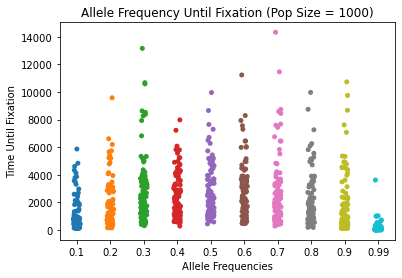

In [38]:
fig, ax = plt.subplots()
seaborn.stripplot(data=data, ax=ax)
ax.set_xlabel("Allele Frequencies")
ax.set_ylabel("Time Until Fixation")
ax.set_title("Allele Frequency Until Fixation (Pop Size = 1000)")
fig.savefig("fixation_time_by_af_plot.png")